In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('results_full.csv')
data['count'] = 1
data['normalised_count'] = data['count'] / data['count'].sum()
data['normalised_admissions'] = data['Admissions'] / data['Admissions'].sum()
data['change_in_time_to_IVT'] = data['msu_ivt_time'] - data['drip_ship_ivt_time']
data['change_in_time_to_MT'] = data['msu_mt_time'] - data['drip_ship_mt_time']
list(data)

['LSOA',
 'nearest_ivt_unit',
 'nearest_ivt_time',
 'nearest_mt_unit',
 'nearest_mt_time',
 'transfer_unit',
 'transfer_required',
 'transfer_time',
 'nearest_msu_unit',
 'nearest_msu_time',
 'Admissions',
 'England',
 'drip_ship_ivt_time',
 'drip_ship_mt_time',
 'nlvo_no_treatment_mrs_0-2',
 'nlvo_no_treatment_utility',
 'lvo_no_treatment_mrs_0-2',
 'lvo_no_treatment_utility',
 'nlvo_drip_ship_ivt_mrs_0-2',
 'nlvo_drip_ship_ivt_mrs_shift',
 'nlvo_drip_ship_ivt_utility',
 'nlvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_ivt_mrs_0-2',
 'lvo_drip_ship_ivt_mrs_shift',
 'lvo_drip_ship_ivt_utility',
 'lvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_mt_mrs_0-2',
 'lvo_drip_ship_mt_mrs_shift',
 'lvo_drip_ship_mt_utility',
 'lvo_drip_ship_mt_utility_shift',
 'lvo_drip_ship_ivt_mt_mrs_0-2',
 'lvo_drip_ship_ivt_mt_mrs_shift',
 'lvo_drip_ship_ivt_mt_utility',
 'lvo_drip_ship_ivt_mt_utility_shift',
 'mothership_ivt_time',
 'mothership_mt_time',
 'nlvo_mothership_ivt_mrs_0-2',
 'nlvo_mothershi

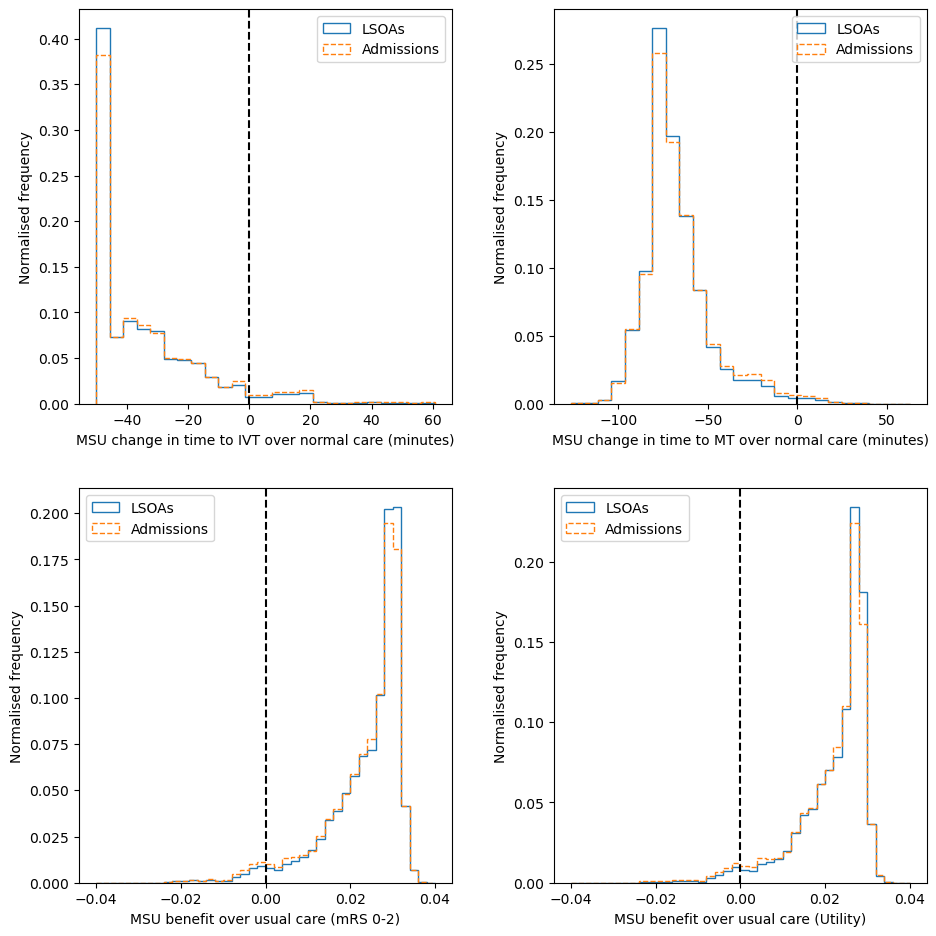

In [3]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(221)
# Histogram of change_in_time_to_IVT for all LSOAs
data['change_in_time_to_IVT'].hist(
    bins=25,
    ax=ax,
    weights=data['normalised_count'],
    histtype='step',
    label='LSOAs')
data['change_in_time_to_IVT'].hist(
    bins=25,
    ax=ax, 
    weights=data['normalised_admissions'],
    histtype='step',
    label='Admissions',
    linestyle='--')

ax.set_xlabel('MSU change in time to IVT over normal care (minutes)')
ax.set_ylabel('Normalised frequency')
ax.legend()
ax.grid(False)
# Add a line at x=0
ax.axvline(x=0, color='black', linestyle='--')

ax = fig.add_subplot(222)
# Histogram of change_in_time_to_MT for all LSOAs
data['change_in_time_to_MT'].hist(
    bins=25,
    ax=ax,
    weights=data['normalised_count'],
    histtype='step',
    label='LSOAs')
data['change_in_time_to_MT'].hist(
    bins=25,
    ax=ax, 
    weights=data['normalised_admissions'],
    histtype='step',
    label='Admissions',
    linestyle='--')
ax.set_xlabel('MSU change in time to MT over normal care (minutes)')
ax.set_ylabel('Normalised frequency')
ax.legend()
ax.grid(False)
# Add a line at x=0
ax.axvline(x=0, color='black', linestyle='--')


# Histogram of msu_mrs_0-2_benefit for all LSOAs
ax = fig.add_subplot(223)
data['msu_mrs_0-2_benefit'].hist(
    bins=np.arange(-0.04, 0.041, 0.002),
    ax=ax,
    weights=data['normalised_count'],
    histtype='step',
    label='LSOAs')
data['msu_mrs_0-2_benefit'].hist(
    bins=np.arange(-0.04, 0.041, 0.002),
    ax=ax, 
    weights=data['normalised_admissions'],
    histtype='step',
    label='Admissions',
    linestyle='--')
ax.set_xlabel('MSU benefit over usual care (mRS 0-2)')
ax.set_ylabel('Normalised frequency')
ax.legend()
ax.grid(False)
# Add a line at x=0
ax.axvline(x=0, color='black', linestyle='--')



ax = fig.add_subplot(224)
# Histogram of msu_net_utility_benefit for all LSOAs
data['msu_net_utility_benefit'].hist(
    bins=np.arange(-0.04, 0.041, 0.002),
    ax=ax,
    weights=data['normalised_count'],
    histtype='step',
    label='LSOAs')
data['msu_net_utility_benefit'].hist(
    bins=np.arange(-0.04, 0.041, 0.002),
    ax=ax, 
    weights=data['normalised_admissions'],
    histtype='step',
    label='Admissions',
    linestyle='--')
ax.set_xlabel('MSU benefit over usual care (Utility)')
ax.set_ylabel('Normalised frequency')
ax.legend()
ax.grid(False)
# Add a line at x=0
ax.axvline(x=0, color='black', linestyle='--')

fig.tight_layout(pad=3)
plt.savefig('histograms.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [4]:
# Set pandas to show 100 rows
pd.set_option('display.max_rows', 100)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
nearest_ivt_time,32843.0,19.506062,8.296385e+00,5.800000,13.300000,17.600000,24.100000,74.500000
nearest_mt_time,32843.0,34.009956,1.965863e+01,5.800000,19.800000,29.400000,43.400000,134.700000
transfer_time,32843.0,26.528521,2.342682e+01,0.000000,0.000000,27.300000,40.200000,117.500000
nearest_msu_time,32843.0,34.526197,1.982860e+01,5.800000,19.800000,29.400000,44.500000,134.700000
Admissions,32843.0,2.466063,1.418715e+00,0.100000,1.333333,2.333333,3.333333,19.333333
England,32843.0,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
drip_ship_ivt_time,32843.0,174.506062,8.296385e+00,160.800000,168.300000,172.600000,179.100000,229.500000
drip_ship_mt_time,32843.0,306.034583,2.644668e+01,265.800000,281.900000,304.900000,321.000000,413.400000
nlvo_no_treatment_mrs_0-2,32843.0,0.580000,1.866313e-13,0.580000,0.580000,0.580000,0.580000,0.580000
nlvo_no_treatment_utility,32843.0,0.599640,2.742293e-13,0.599640,0.599640,0.599640,0.599640,0.599640
